# **XGBoost**

---
**Creates a classification model to predict categories of wines.**

**Dataset contains data for several wines.** 

---

In [ ]:
import xgboost
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import matplotlib
import pandas
import numpy

SPLITTER = sklearn.model_selection.train_test_split

# Prepares data.

inputs, outputs = sklearn.datasets.load_wine(return_X_y = True, as_frame = True)
data            = inputs.assign(category = outputs)
train_inp, test_inp, train_out, test_out = SPLITTER(inputs, 
                                                    outputs, 
                                                    test_size    = 0.2, 
                                                    random_state = 1234)

# Presents data summary statistics.

def describe(data):
        """
        Presents summary statistics for data.
        """

        print(f"\n\nnumber of features: {data.shape[1] - 1}")
        print(f"\n\nnumber of input output pairs: {data.shape[0]}")
        print("\n\nsome input output pairs:\n")  
        display(data.head())
        print("\n\noutput counts:\n")
        print(data.iloc[:, -1].value_counts())
        print("\n\ninput summary statistics:\n")
        display(data.iloc[:, :-1].describe()) 

describe(data)



number of features: 13


number of input output pairs: 178


some input output pairs:



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




output counts:

1    71
0    59
2    48
Name: category, dtype: int64


input summary statistics:



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
PRF1 = sklearn.metrics.precision_recall_fscore_support

# Creates models.

model = xgboost.XGBClassifier()
model.fit(train_inp, train_out)

# Displays accuracy reports.

def report_class(model, test_inp, test_out):
        preds = model.predict(test_inp)
        acc   = 100 * sklearn.metrics.accuracy_score(test_out, preds)
        prf1  = PRF1(test_out, preds)
        print(f"\n\naccuracy: {acc}")
        print(f"\n\nprecision: {prf1[0]}")
        print(f"\n\nrecall: {prf1[0]}")
        print(f"\n\nF1 score: {prf1[0]}")
        print("\n\nconfusion matrix:\n")
        print(sklearn.metrics.confusion_matrix(test_out, preds))

report_class(model, test_inp, test_out)



accuracy: 91.66666666666666


precision: [1.   1.   0.75]


recall: [1.   1.   0.75]


F1 score: [1.   1.   0.75]


confusion matrix:

[[ 9  0  1]
 [ 0 15  2]
 [ 0  0  9]]


---
**Creates a regression model to predict house prices.**

**Dataset contains data for several California houses.**

---



number of features: 8


number of input output pairs: 20640


some input output pairs:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422




summary statistics:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010




scatter plot matrix:



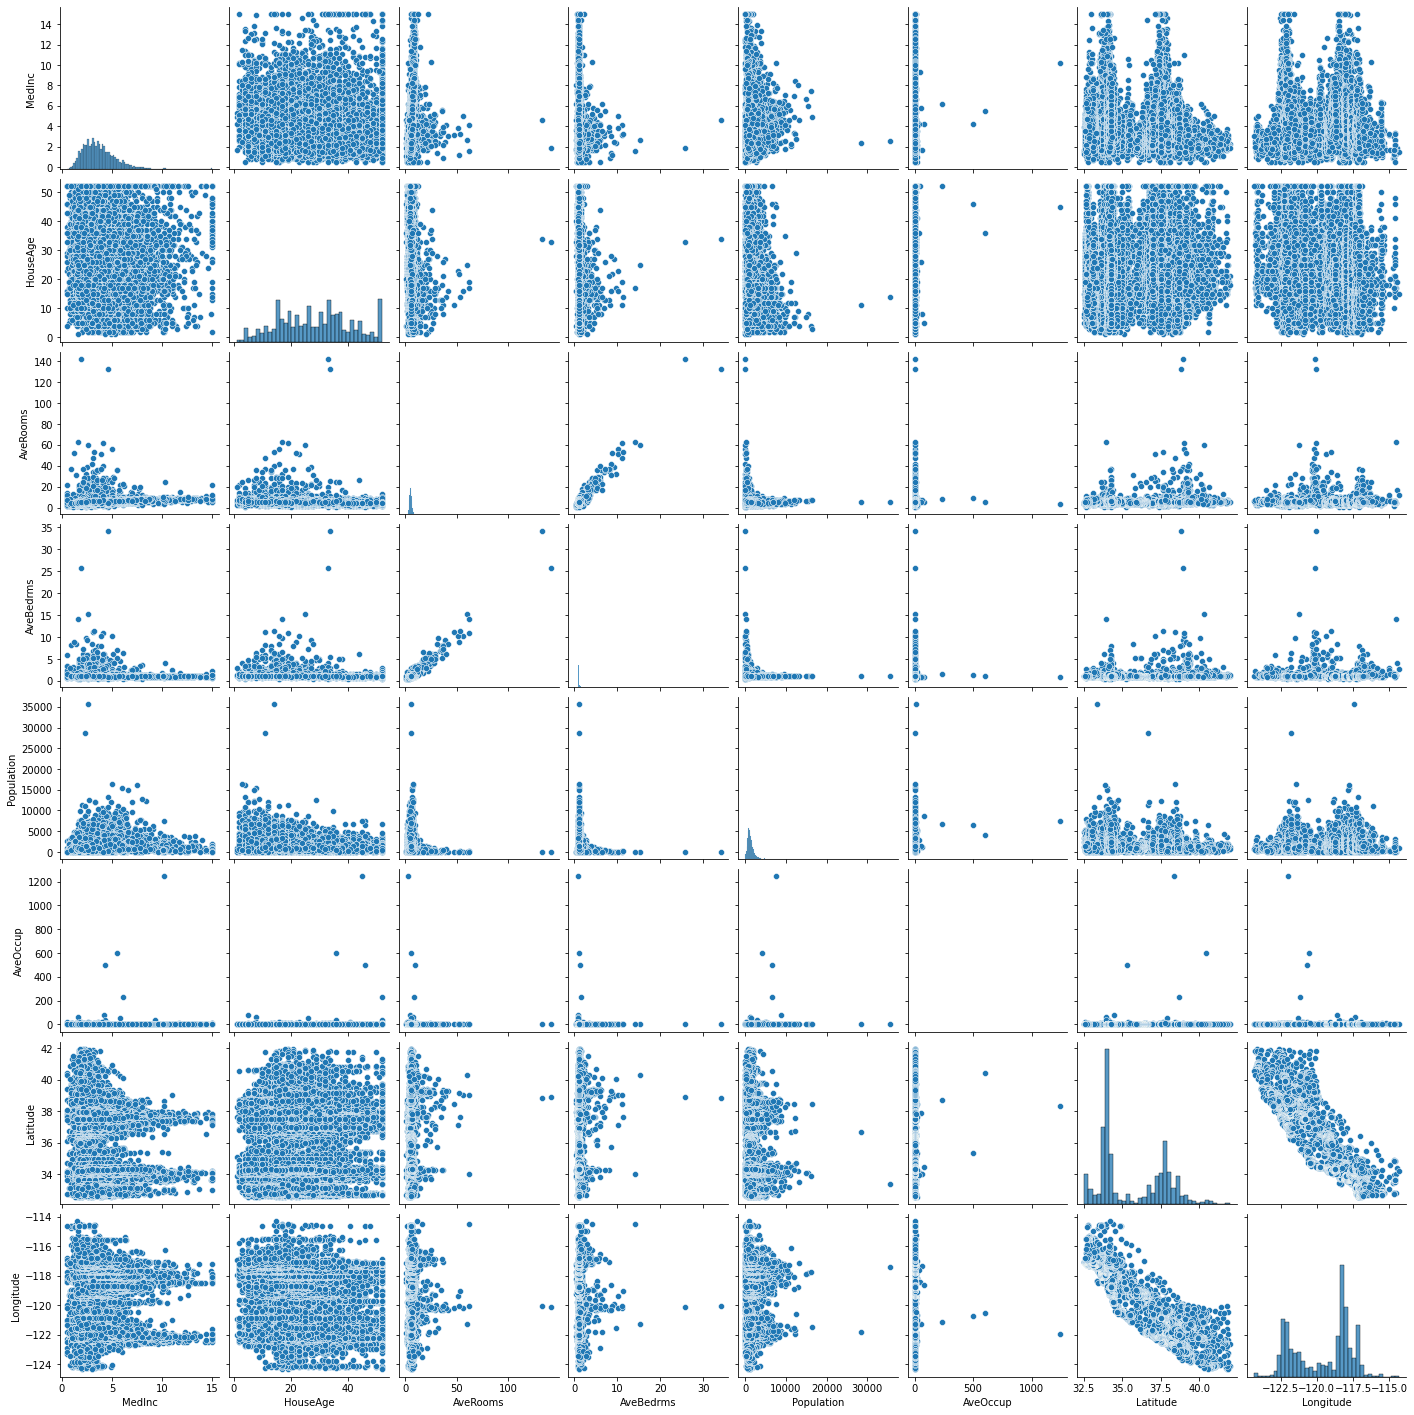

In [ ]:
import xgboost
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import seaborn
import matplotlib
import pandas
import numpy

SPLITTER = sklearn.model_selection.train_test_split

# Prepares data.

data    = sklearn.datasets.fetch_california_housing()
inputs  = pandas.DataFrame(data.data, columns = data.feature_names)
outputs = pandas.Series(data.target)
data    = inputs.assign(price = outputs)
train_inp, test_inp, train_out, test_out = SPLITTER(inputs, 
                                                    outputs, 
                                                    test_size    = 0.2, 
                                                    random_state = 1234)

def describe(data):
        """
        Presents summary statistics for data.
        """

        print(f"\n\nnumber of features: {data.shape[1] - 1}")
        print(f"\n\nnumber of input output pairs: {data.shape[0]}")
        print("\n\nsome input output pairs:\n")  
        display(data.head())
        print("\n\nsummary statistics:\n")
        display(data.describe()) 
        print("\n\nscatter plot matrix:\n")      
        seaborn.pairplot(data.iloc[:, :-1])
        matplotlib.pyplot.show()

# Presents data summary statistics.

describe(data)

In [ ]:
# Creates models.

model = xgboost.XGBRegressor(objective = "reg:squarederror")
model.fit(train_inp, train_out)

# Displays accuracy reports.

def report_reg(model, test_inp, test_out):
        preds = model.predict(test_inp)
        rmse  = sklearn.metrics.mean_squared_error(test_out, preds)
        mae   = sklearn.metrics.mean_absolute_error(test_out, preds)
        r2    = sklearn.metrics.r2_score(test_out, preds)
        print(f"\n\nrmse: {rmse}")
        print(f"\n\nmae: {mae}")
        print(f"\n\nR2: {mae}")
        
report_reg(model, test_inp, test_out)



rmse: 0.29496345141385105


mae: 0.3733461505983042


R2: 0.3733461505983042


---
**Creates a classification model to predict likely bank term deposit customers.**

**Dataset contains data for several Portuguese banking institution customer phone interactions in a marketign campaign.**

**For further information about the dataset click [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).**

---



number of features: 16


number of input output pairs: 45211


some input output pairs:



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no




summary statistics:



,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000




scatter plot matrix:



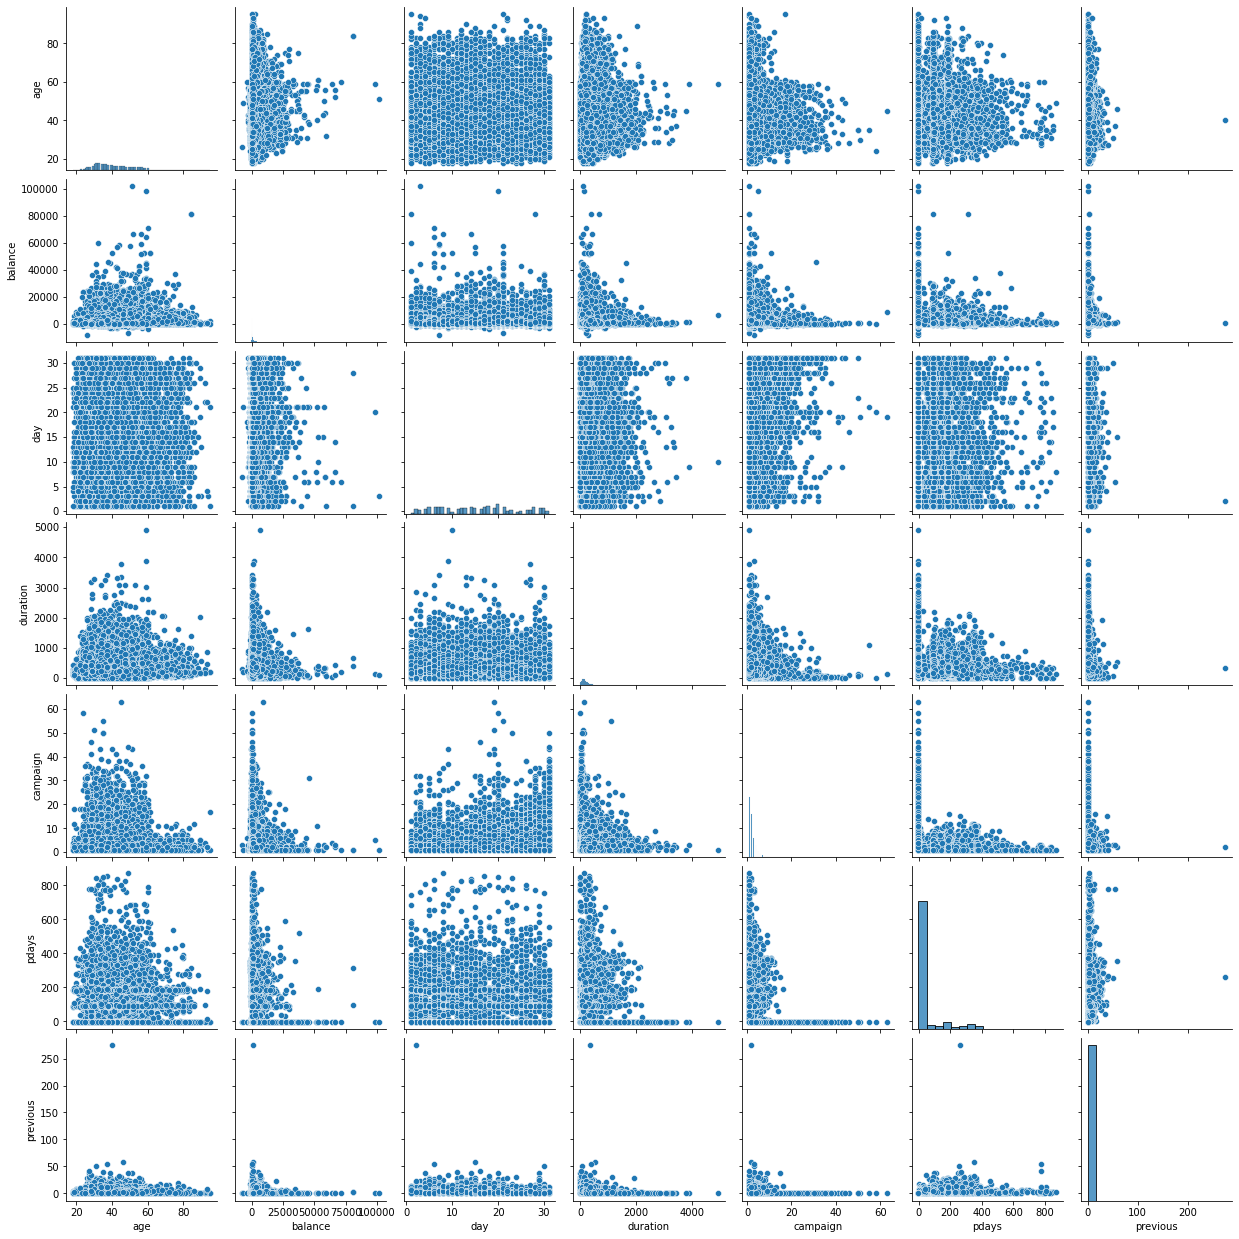

In [ ]:
import xgboost
import sklearn.metrics
import seaborn
import matplotlib
import pandas
import numpy

DATA_URL = "https://raw.githubusercontent.com/North-Houston-DAAML/talks/main/Basic-Machine-Learning/SKL_XGB/bank_marketing_campaign_dataset"
SPLITTER = sklearn.model_selection.train_test_split

# Prepares data.

data    = pandas.read_csv(DATA_URL, sep = ",")
inputs  = data.loc[:, data.columns != "y"]
outputs = data["y"]
train_inp, test_inp, train_out, test_out = SPLITTER(inputs, 
                                                    outputs, 
                                                    test_size    = 0.2, 
                                                    random_state = 1234)

def describe(data):
        """
        Presents summary statistics for data.
        """

        print(f"\n\nnumber of features: {data.shape[1] - 1}")
        print(f"\n\nnumber of input output pairs: {data.shape[0]}")
        print("\n\nsome input output pairs:\n")  
        display(data.head())
        print("\n\nsummary statistics:\n")
        display(data.describe()) 
        print("\n\nscatter plot matrix:\n")      
        seaborn.pairplot(data.iloc[:, :-1])
        matplotlib.pyplot.show()

# Presents data summary statistics.

describe(data)

**Need to numerically encode several features!**

In [ ]:
import sklearn.preprocessing

MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", 
             "Oct", "Nov", "Dec"]

# Creates a one hot encoding engine.

ohe = sklearn.preprocessing.OneHotEncoder()

# Displays string feature values.

for e in ["job", "marital", "education", "default", "housing",	"loan",	
             "contact", "month", "poutcome", "y"]:
      print(f"{(e + ':').ljust(10)} {set(data[e])}")

# One hot encodes string columns.

for e in ["job", "marital", "education", "contact", "poutcome"]:
        dummies         = ohe.fit_transform(data[[e]]).toarray()
        dummies         = pandas.DataFrame(dummies).astype(int)
        dummies.columns = [f"{e}_{c}" for c in ohe.categories_[0]]
        data            = data.drop(e, axis = 1)
        data            = pandas.concat([data, dummies], 
                                         axis = 1, 
                                         join = "inner")
for e in ["default", "housing", "loan", "y"]:
        data[e] = data[e].map({"yes" : 1, "no" : 0})

# Numerically encodes the month column.

map           = [(e.lower(), i) for i, e in enumerate(MONTHS)]
data["month"] = data["month"].map(dict(map))

# Displays new data

display(data)

job:       {'unemployed', 'services', 'entrepreneur', 'management', 'self-employed', 'unknown', 'student', 'retired', 'technician', 'blue-collar', 'admin.', 'housemaid'}
marital:   {'divorced', 'married', 'single'}
education: {'unknown', 'primary', 'secondary', 'tertiary'}
default:   {'yes', 'no'}
housing:   {'yes', 'no'}
loan:      {'yes', 'no'}
contact:   {'cellular', 'unknown', 'telephone'}
month:     {'oct', 'dec', 'aug', 'jan', 'sep', 'mar', 'jun', 'may', 'apr', 'jul', 'feb', 'nov'}
poutcome:  {'unknown', 'other', 'success', 'failure'}
y:         {'yes', 'no'}


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,4,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,4,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,4,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,4,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,4,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,10,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,10,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,10,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,10,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
PRF1 = sklearn.metrics.precision_recall_fscore_support

# Splits data.

inputs  = data.loc[:, data.columns != "y"]
outputs = data["y"]
train_inp, test_inp, train_out, test_out = SPLITTER(inputs, 
                                                    outputs, 
                                                    test_size    = 0.2, 
                                                    random_state = 1234)

# Creates models.

model = xgboost.XGBClassifier()
model.fit(train_inp, train_out)

# Displays accuracy reports.

def report_class(model, test_inp, test_out):
        preds = model.predict(test_inp)
        acc   = 100 * sklearn.metrics.accuracy_score(test_out, preds)
        prf1  = PRF1(test_out, preds)
        print(f"\n\naccuracy: {acc}")
        print(f"\n\nprecision: {prf1[0]}")
        print(f"\n\nrecall: {prf1[0]}")
        print(f"\n\nF1 score: {prf1[0]}")
        print("\n\nconfusion matrix:\n")
        print(sklearn.metrics.confusion_matrix(test_out, preds))

report_class(model, test_inp, test_out)



accuracy: 90.7995134358067


precision: [0.92300425 0.68695652]


recall: [0.92300425 0.68695652]


F1 score: [0.92300425 0.68695652]


confusion matrix:

[[7816  180]
 [ 652  395]]


**Do hyperparameter searches to improve the accuracy.**

In [ ]:
# Creates models using searches with five fold cross validation.

params    = {"n_estimators" : range(50, 300, 50),
             "max_depth"    : range(2, 10, 2)}
estimator = xgboost.XGBClassifier()
search    = sklearn.model_selection.GridSearchCV(estimator  = estimator,
                                                 param_grid = params,
                                                 scoring    = "accuracy")
model     = search.fit(train_inp, train_out)

In [ ]:
# Displays hyperparameters.

print("best model: ", model.best_estimator_)

# Displays accuracy reports.

report_class(model, test_inp, test_out)

best model:  XGBClassifier(max_depth=6, n_estimators=200)


accuracy: 90.99856242397435


precision: [0.93474576 0.64878672]


recall: [0.93474576 0.64878672]


F1 score: [0.93474576 0.64878672]


confusion matrix:

[[7721  275]
 [ 539  508]]


In [ ]:
# Creates models using searches with five fold cross validation.

params    = {"n_estimators"  : [200],
             "max_depth"     : [6],
             "learning_rate" : [0.1, 0.3],
             "subsample"     : [0.6, 1.0]}
estimator = xgboost.XGBClassifier()
search    = sklearn.model_selection.GridSearchCV(estimator  = estimator,
                                                 param_grid = params,
                                                 scoring    = "accuracy")
model     = search.fit(train_inp, train_out)

In [ ]:
# Displays hyperparameters.

print("best model: ", model.best_estimator_)

# Displays accuracy reports.

report_class(model, test_inp, test_out)

best model:  XGBClassifier(max_depth=6, n_estimators=200, subsample=1.0)


accuracy: 90.99856242397435


precision: [0.93474576 0.64878672]


recall: [0.93474576 0.64878672]


F1 score: [0.93474576 0.64878672]


confusion matrix:

[[7721  275]
 [ 539  508]]
